# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [ ]:
train_veg = "C:/vegetables/train"
validation_veg = "C:/vegetables/validation"
test_veg  = "C:/vegetables/test"

categories = os.listdir(train_veg)
categories.sort()
"Categories Count :" ,len(categories)

('Categories Count :', 36)

# Count of training data

In [ ]:
train = []

Image_SIZE=100

for category in categories:
    folder = os.path.join(train_veg,category)
    label = categories.index(category)
    
    for file in os.listdir(folder):
        file = os.path.join(folder,file)
        img = cv2.imread(file)
        try:
            img_arr = cv2.resize(img,(Image_SIZE,Image_SIZE))
            train.append([img_arr,label])
            
        except:
            pass
        
            
"Training_vegetable_Image_Count",len(train)

('Training_vegetable_Image_Count', 3114)

# Count of validation data

In [ ]:
validation = []

count = int(0)
for category in categories:
    folder = os.path.join(validation_veg,category)
    label = categories.index(category)
    
    for file in os.listdir(folder):
        file = os.path.join(folder,file)
        #print(file)
        image = cv2.imread(file)
        try:
            image_arr = cv2.resize(img,(Image_SIZE,Image_SIZE))
            validation.append([image_arr,label])
        except:
            count+=1
            pass
len(validation),count

(351, 0)

# Count of testing data

In [ ]:
test = []
for category in categories:
    folder = os.path.join(test_veg,category)
    label = categories.index(category)
    
    for file in os.listdir(folder):
        file = os.path.join(folder,file)
        image = cv2.imread(file)
        try:
            image_arr = cv2.resize(img,(Image_SIZE,Image_SIZE))
            test.append([image_arr,label])
        except:
            pass
len(test)

359

In [ ]:
image, label = train[10]
print(image.shape)

(100, 100, 3)


In [ ]:
"Train:",len(train),"Validation:",len(validation),"Test :",len(test)

('Train:', 3114, 'Validation:', 351, 'Test :', 359)

In [ ]:
x_vegtrain = []
y_vegtrain = []
x_vegvalidation = []
y_vegvalidation = []
x_vegtest = []
y_vegtest = []

for features , label  in train:
    x_vegtrain.append(features)
    y_vegtrain.append(label)
y_vegtrain = pd.get_dummies(y_vegtrain)
for features , label  in validation:
    x_vegvalidation.append(features)
    y_vegvalidation.append(label)
y_vegvalidation = pd.get_dummies(y_vegvalidation)
for features , label  in test:
    x_vegtest.append(features)
    y_vegtest.append(label)
y_vegtest = pd.get_dummies(y_vegtest)


x_vegtrain = np.array(x_vegtrain)/255
y_vegtrain = np.array(y_vegtrain)

x_vegvalidation = np.array(x_vegvalidation)/255
y_vegvalidation = np.array(y_vegvalidation)

x_vegtest = np.array(x_vegtest)/255
y_vegtest = np.array(y_vegtest)

len(x_vegtrain),len(y_vegtrain),len(x_vegvalidation),len(y_vegvalidation),len(x_vegtest),len(y_vegtest)

(3114, 3114, 351, 351, 359, 359)

In [ ]:
y_vegtrain.shape,y_vegvalidation.shape,y_vegtest.shape

((3114, 36), (351, 36), (359, 36))

In [ ]:
batch_size = 138
epochs = 8
IMG_HEIGHT = 130
IMG_WIDTH = 130

# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization,Dropout

In [ ]:
model_veg = Sequential()

model_veg.add(Conv2D(128,(3,3),activation="relu"))
model_veg.add(MaxPooling2D(3,3))

model_veg.add(Conv2D(128,(5,5),activation="relu"))
model_veg.add(MaxPooling2D(5,5)) 


model_veg.add(Flatten())


model_veg.add(Dense(128,input_shape = x_veg_train.shape[1:],activation="relu"))
model_veg.add(Dense(36,activation="softmax"))

# Model Fitting

In [ ]:
model_veg.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])
history = model_veg.fit(x_vegtrain,y_vegtrain,epochs=10,validation_data=(x_vegtest,y_vegtest))

Epoch 1/10
98/98 [==============================] - 88s 895ms/step - loss: 3.3812 - accuracy: 0.0755 - val_loss: 4.5330 - val_accuracy: 0.0279
Epoch 2/10
98/98 [==============================] - 91s 927ms/step - loss: 2.6780 - accuracy: 0.2267 - val_loss: 5.6547 - val_accuracy: 0.0279
Epoch 3/10
98/98 [==============================] - 91s 931ms/step - loss: 2.2791 - accuracy: 0.3186 - val_loss: 5.0408 - val_accuracy: 0.0279
Epoch 4/10
98/98 [==============================] - 92s 943ms/step - loss: 2.0566 - accuracy: 0.3834 - val_loss: 5.7948 - val_accuracy: 0.0279
Epoch 5/10
98/98 [==============================] - 95s 965ms/step - loss: 1.8940 - accuracy: 0.4316 - val_loss: 5.9997 - val_accuracy: 0.0279
Epoch 6/10
98/98 [==============================] - 89s 912ms/step - loss: 1.7136 - accuracy: 0.4929 - val_loss: 5.7950 - val_accuracy: 0.0279
Epoch 7/10
98/98 [==============================] - 92s 935ms/step - loss: 1.5791 - accuracy: 0.5305 - val_loss: 5.6046 - val_accuracy: 0.0279

In [ ]:
model_veg.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model Summary

In [ ]:
model_veg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       409728    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# ResNet50

In [ ]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = 'C:/veg_fruit'

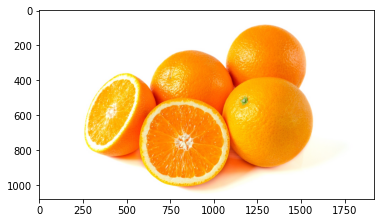

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:/veg_fruit/orange/Image_3.jpg"))

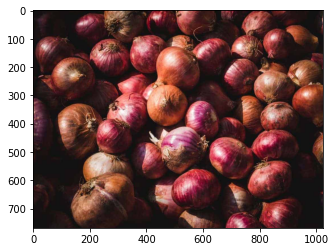

In [ ]:
plt.imshow(plt.imread("C:/veg_fruit/onion/Image_3.jpg"))

In [ ]:
train_data = ImageDataGenerator(validation_split=0.3,
                                   preprocessing_function=preprocess_input) 

train_generator = train_data.flow_from_directory( df,
                                                     target_size=(224,224),
                                                     batch_size=100,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

validation_data = ImageDataGenerator(validation_split=0.3,
                                        preprocessing_function=preprocess_input)

validation_generator =  validation_data.flow_from_directory( df,
                                                                target_size=(224,224),
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                subset='validation')   

Found 115 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
model_res50 = Sequential()

model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_res50.add(Dense(1, activation='sigmoid'))

model_res50.layers[0].trainable = False 

model_res50.summary()


steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_res50.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model = model_res50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=7,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/7
2/2 [==============================] - 26s 10s/step - loss: 0.8082 - accuracy: 0.4609 - val_loss: 0.5301 - val_accuracy: 0.7500
Epoch 2/7
2/2 [==============================] - 20s 7s/step - loss: 0.5769 - accuracy: 0.6957 - val_loss: 0.3748 - val_accuracy: 0.8333
Epoch 3/7
2/2 [==============================] - 20s 18s/step - loss: 0.3880 - accuracy: 0.8348 - val_loss: 0.2733 - val_accuracy: 0.9375
Epoch 4/7
2/2 [==============================] - 21s 18s/step - loss: 0.3001 - accuracy: 0.8870 - val_loss: 0.2032 - val_accuracy: 1.0000
Epoch 5/7
2/2 [==============================] - 22s 8s/step - loss: 0.2563 - accuracy: 0.9043 - val_loss: 0.1551 - val_accuracy: 1.0000
Epoch 6/7
2/2 [==============================] - 21s 18s/step - loss: 0.1890 - accuracy: 0.9478 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 7/7
2/2 [==============================] - 21s 8s/step - loss: 0.1669 - accuracy: 0.9565 - val_loss: 0.0961 - val_accuracy: 1.0000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


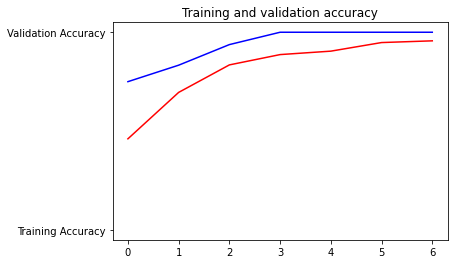

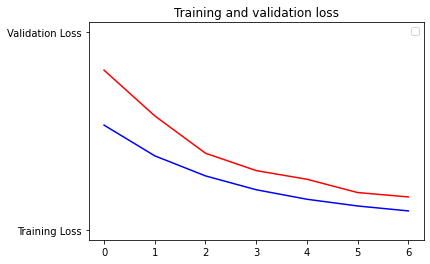

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


accuracy=model.history['accuracy']
val_accuracy=model.history['val_accuracy']
loss=model.history['loss']
val_loss=model.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()